<a href="https://colab.research.google.com/github/Protogenic/Python/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import utils
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files

In [45]:
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip -O master.zip

--2021-04-15 18:40:25--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master [following]
--2021-04-15 18:40:25--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [      <=>           ] 109.36M  19.2MB/s               ^C


In [46]:
!unzip master.zip

Archive:  master.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of master.zip or
        master.zip.zip, and cannot find master.zip.ZIP, period.


In [47]:
train_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Training', subset='training', seed=42, validation_split=0.1, batch_size=256, image_size=(100, 100))
validation_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Training', subset='validation', seed=42, validation_split=0.1, batch_size=256, image_size=(100, 100))

Found 67692 files belonging to 131 classes.
Using 60923 files for training.
Found 67692 files belonging to 131 classes.
Using 6769 files for validation.


In [48]:
class_names = train_dataset.class_names

In [49]:
test_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Test', batch_size=256, image_size=(100, 100))

Found 22688 files belonging to 131 classes.


In [50]:
model = Sequential()
#Часть для свертки
model.add(Conv2D(16, (5, 5), padding='same', input_shape=(100, 100, 3), activation='relu'))  #same значит входящие файлы имеют одинаковыю ширину и высоту, размер картинки 100 на 100
model.add(MaxPooling2D(pool_size=(2,2))) #pool означает max pooling (выбор максимума из значений) из области 2 на 2
model.add(Conv2D(32, (5, 5), padding='same', activation='relu')) #relu функция активации которая возвращает x при x>0, 32 фильтра, которые применяются к изображению
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Часть для классификации
model.add(Flatten()) #Входные слои
model.add(Dense(1024, activation='relu')) #Скрытый слой (1024 нейрона)
model.add(Dropout(0.2)) #Выключинеи 0.2 части нейронов, для лучшей обучаемости
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(131, activation='softmax')) #131 выходной нейрон, так как 131 класс фруктов, активация максимального

In [51]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy') #Компиляция модели
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5, verbose=1) #Обучение на протяжении 5 эпох, verbose для отображения шкалы обучения

Epoch 1/5
238/238 [==============================] - 1082s 5s/step - loss: 3.0560 - val_loss: 0.0285
Epoch 2/5
238/238 [==============================] - 1084s 5s/step - loss: 0.0823 - val_loss: 0.0181
Epoch 3/5
238/238 [==============================] - 1088s 5s/step - loss: 0.0561 - val_loss: 0.0078
Epoch 4/5
238/238 [==============================] - 1090s 5s/step - loss: 0.0278 - val_loss: 0.0327
Epoch 5/5
238/238 [==============================] - 1087s 5s/step - loss: 0.0371 - val_loss: 0.0576


In [56]:
scores = model.evaluate(test_dataset, verbose=1)

89/89 [==============================] - 111s 1s/step - loss: 0.4670


In [61]:
print("Доля верных ответов в процентах: ", 100-scores)

Доля верных ответов в процентах:  99.53296864032745


In [60]:
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

KeyError: ignored

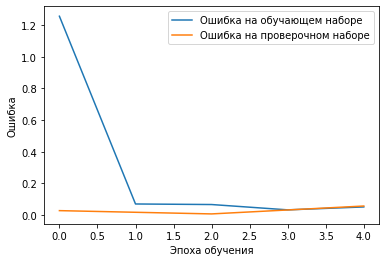

In [62]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [66]:
model.save("fruits_360_model.h5")
files.download("fruits_360_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>